In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
x = np.arange(0.0, 2.1, 0.1)
y = np.array([-0.3362, 1.806, 2.8101, 0.6112, 2.2959, 2.8481, 0.1808,
             0.5416, 2.793, 2.0963, 3.5, 3.9834, 4.2866, 5.3261,
             5.2257, 6.3355, 4.6026, 6.5253, 7.2156, 6.6904, 9.5773])

In [3]:
X = np.array([np.array([1, e, e**2, e**3, e**4, e**5]) for e in x])

In [4]:
def ridge_regression(lmbd, X, y):
    v = np.linalg.inv(X.T.dot(X)+ lmbd*np.eye(X.shape[1])).dot(X.T).dot(y)
    return v

In [5]:
def cv_ridge_regression(lmbd, X, y):
    #cross-validation по определению
    cv = 0.
    for i in range(X.shape[0]):
        X_ = np.delete(X, i, 0)
        y_ = np.delete(y, i, 0)
        v = np.linalg.inv(X_.T.dot(X_)+ lmbd*np.eye(X_.shape[1])).dot(X_.T).dot(y_)
        cv += (X[i].dot(v) - y[i]) ** 2
    return cv/float(X.shape[0])

In [6]:
def cv_ridge_regression_formula(lmbd, X, y):
    #cross-validation с помощью формулы из задачи 2 
    cv = 0.
    t = X.dot(np.linalg.inv(X.T.dot(X)+ lmbd*np.eye(X.shape[1])).dot(X.T).dot(y))
    H = np.diag(X.dot(np.linalg.inv(X.T.dot(X)+ lmbd*np.eye(X.shape[1])).dot(X.T)))
    for j in range(len(y)):
        cv += ((y[j] - t[j])/float(1 - H[j])) * ((y[j] - t[j])/float(1 - H[j]))
    return cv/float(len(y))

In [7]:
lmbd = np.arange(0, 50, 0.01) #диапазон параметра регуляризации от 0 до 50 с шагом 0.1

In [8]:
%%time
cv_lmbd_formula = [cv_ridge_regression_formula(l, X, y) for l in lmbd]

CPU times: user 636 ms, sys: 20 ms, total: 656 ms
Wall time: 1.24 s


In [9]:
%%time
cv_lmbd = [cv_ridge_regression(l, X, y) for l in lmbd]

CPU times: user 6.59 s, sys: 0 ns, total: 6.59 s
Wall time: 6.58 s


С применением формулы cross-validation считается в 10 раз быстрее, так как обратить матрицу достаточно всего один раз.

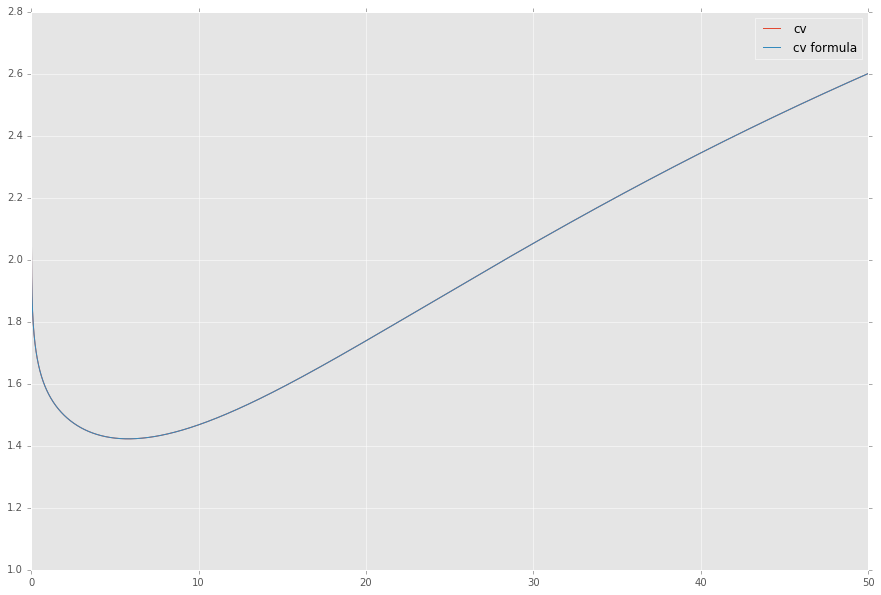

In [10]:
plt.plot(lmbd, cv_lmbd, label = "cv")
plt.plot(lmbd, cv_lmbd_formula, label = "cv formula")
plt.legend()
plt.show()

На графике подтверждается корректность формулы.

In [11]:
lmbd[np.argmin(cv_lmbd)]

0.0

Минимальная ошибка достигается при lambda = 0

In [12]:
lmbd[np.argmin(cv_lmbd[1:])]

5.79

Не принимая во внимание lambda = 0, минимальная ошибка достигается при lambda = 5.79

In [13]:
print "while lambda = 0, cv =", cv_ridge_regression(0, X, y)
print "while lambda = 5.79, cv =", cv_ridge_regression(5.79, X, y)

while lambda = 0, cv = 1.04187494878
while lambda = 5.79, cv = 1.42247669354


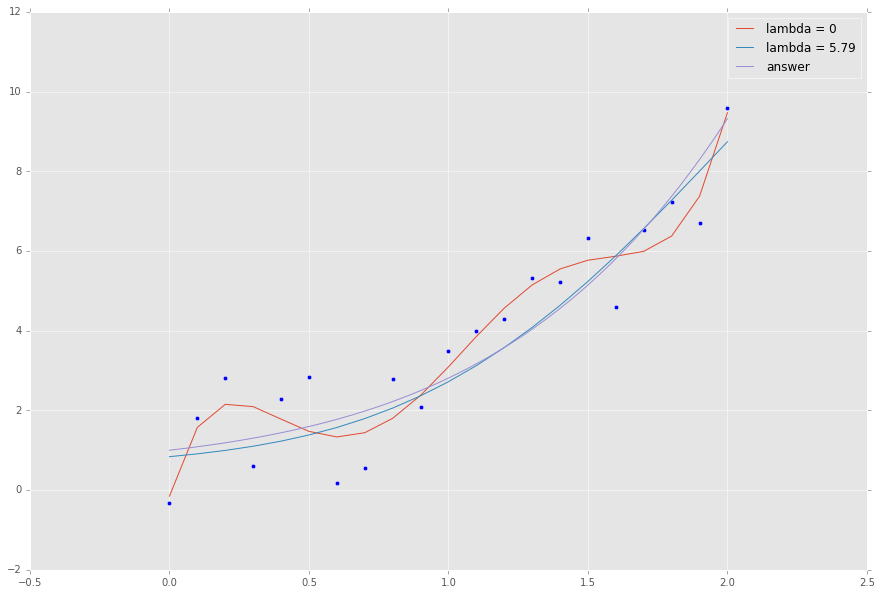

In [14]:
plt.scatter(x,y)
plt.plot(x, X.dot(ridge_regression(0, X, y)), label = "lambda = 0")
plt.plot(x, X.dot(ridge_regression(5.79, X, y)), label = "lambda = 5.79")
t = np.linspace(0., 2.0, 1000)
plt.plot(t, 1 + 0.8*t + 0.6*(t**2) + 0.3*(t**3) + 0.1*(t**4)+0.01*(t**5), label = "answer")
plt.legend()
plt.show()

На графике выше видно, что регрессия с lambda = 5.79 точнее приближает исходный полином, а регрессия с lambda = 0 переобучается на шум.